**Upload & Load the Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving all_jobs.xlsx to all_jobs.xlsx


In [3]:
import pandas as pd
df = pd.read_excel('all_jobs.xlsx')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,site,job_url,job_url_direct,title,company,location,...,company_addresses,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,mean_salary,cleaned_description
0,0,0,0,487e95701c0d55b3,indeed,https://www.indeed.com/viewjob?jk=487e95701c0d...,https://jobs.gusto.com/postings/riscpoint-advi...,Cybersecurity Operations Senior Consultant,RISCPoint,"Remote, US",...,"2814 Detroit Ave \nCleveland, Ohio 44113, US",11 to 50,NaN,RISCPoint Advisory Group is an industry leader...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,NaN,NaN,120000.0,riscpoint is seeking a conceptual thinker with...
1,1,1,1,679ff0528b73610f,indeed,https://www.indeed.com/viewjob?jk=679ff0528b73...,https://www.marketaxess.com/careers/current-op...,Senior Information Security Engineer (GRC),MarketAxess Holdings,"New York, NY, US",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175000.0,company description marketaxess is on a journe...
2,2,2,2,41f6f886cd9b9d1d,indeed,https://www.indeed.com/viewjob?jk=41f6f886cd9b...,https://workforcenow.adp.com/mascsr/default/md...,Information System Security Officer II,Global Resource Solutions,"Colorado Springs, CO, US",...,Fairfax,51 to 200,$5M to $25M (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,95880.5,"global resource solutions, inc. (grs) is seeki..."
3,3,3,3,f82f829d7cf62384,indeed,https://www.indeed.com/viewjob?jk=f82f829d7cf6...,https://workforcenow.adp.com/mascsr/default/md...,Cyber Operations Support Specialist,"Cole Engineering Services, Inc","Fort Meade, MD, US",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117500.0,**company overview:** by light professional it...
4,4,4,4,895d9f28e9e5ee10,indeed,https://www.indeed.com/viewjob?jk=895d9f28e9e5...,https://mufgub.wd3.myworkdayjobs.com/MUFG-Care...,"Identity & Access Management, Analyst",MUFG,"Tampa, FL, US",...,Tokyo,"10,000+",more than $10B (USD),MUFG (Mitsubishi UFJ Financial Group) is the s...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,Kevin Cronin,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...,96000.0,**do you want your voice heard and your action...


**Clean the Dataset**

In [4]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'job_url', 'job_url_direct',
                      'company_url', 'company_url_direct'])

# Drop rows with null titles or salaries
df = df[df['title'].notnull()]
df = df[df['mean_salary'].notnull()]
df = df.drop_duplicates()

**Label Job Category**

In [5]:
def categorize_job(title):
    title = str(title).lower()
    if 'data' in title or 'ml' in title or 'ai' in title or 'scientist' in title:
        return 'Data Science'
    elif 'product' in title or 'manager' in title:
        return 'Product Management'
    elif 'cyber' in title or 'security' in title:
        return 'Cybersecurity'
    elif 'it ' in title or 'technician' in title:
        return 'IT'
    else:
        return 'Software Engineering'

df['job_category'] = df['title'].apply(categorize_job)

**Job Count per Category**

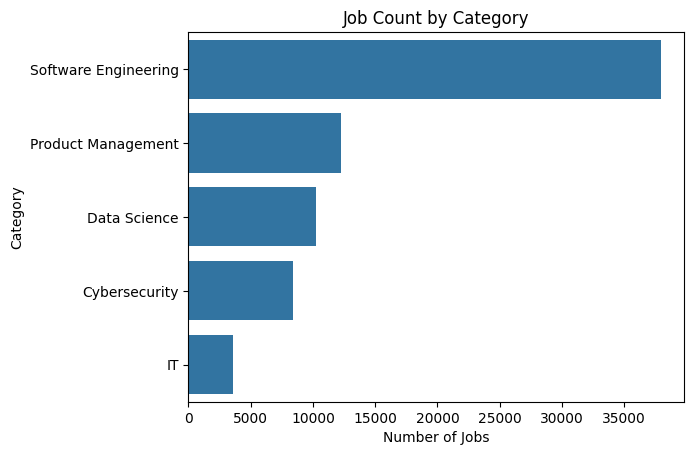

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y='job_category', data=df, order=df['job_category'].value_counts().index)
plt.title('Job Count by Category')
plt.xlabel('Number of Jobs')
plt.ylabel('Category')
plt.show()

**Avg Salary per Category**

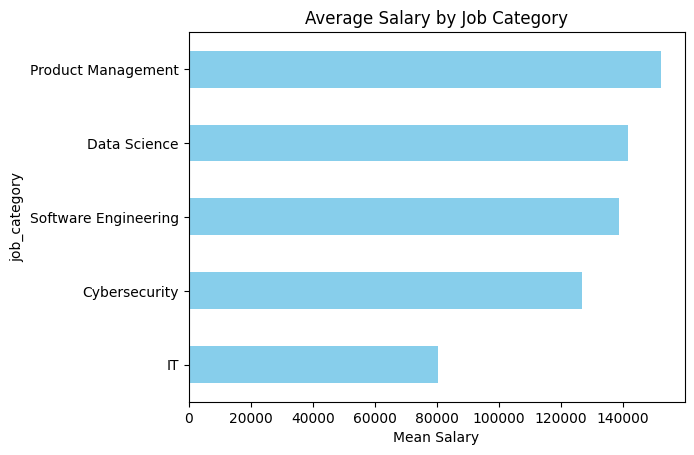

In [7]:
df.groupby('job_category')['mean_salary'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Salary by Job Category')
plt.xlabel('Mean Salary')
plt.show()

**Top Hiring Companies in Each Category**

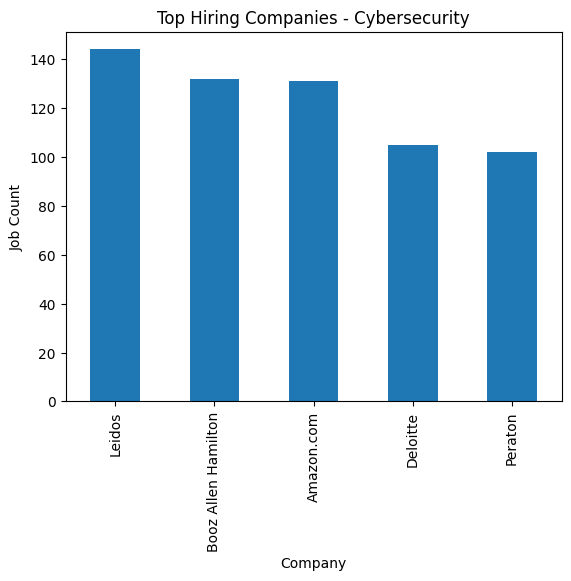

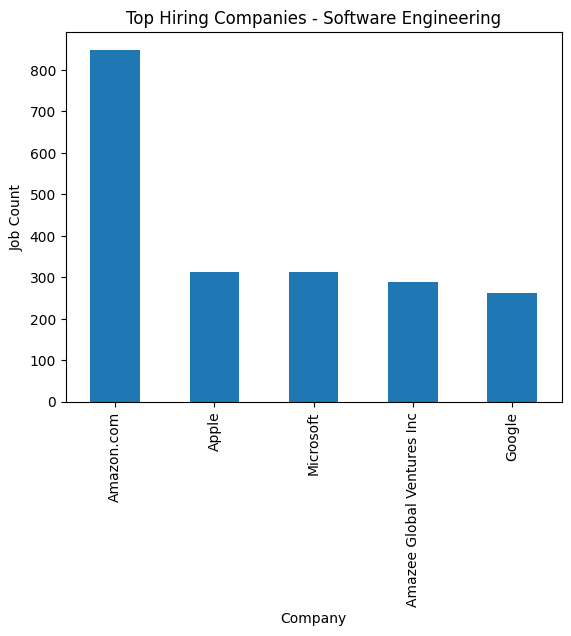

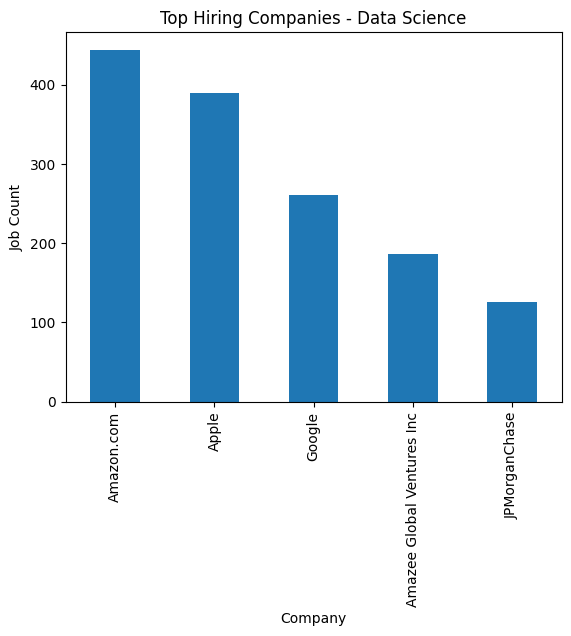

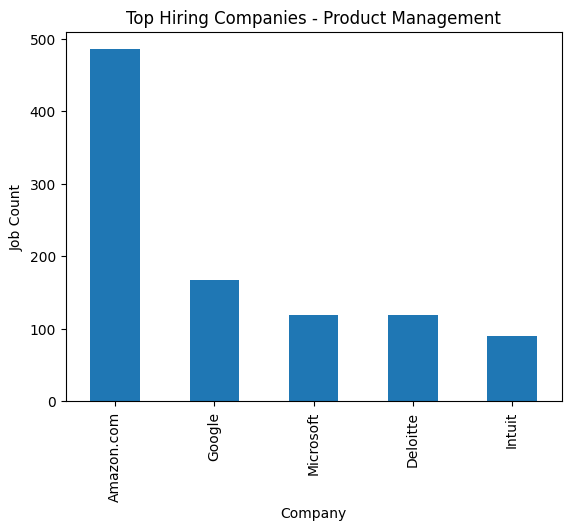

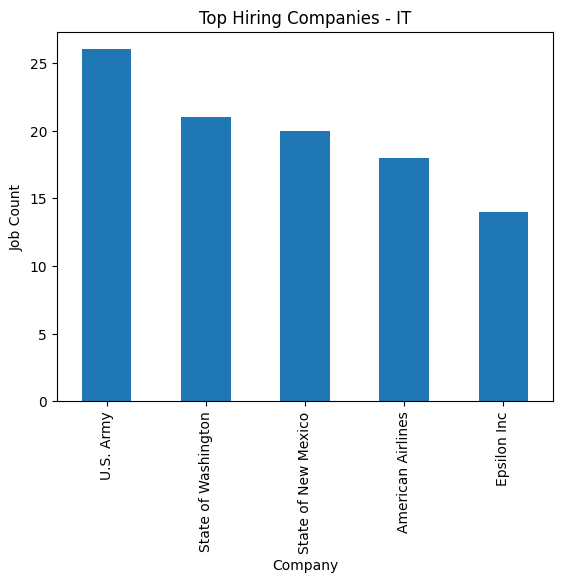

In [8]:
categories = df['job_category'].unique()

for cat in categories:
    top_companies = df[df['job_category'] == cat]['company'].value_counts().head(5)
    top_companies.plot(kind='bar', title=f'Top Hiring Companies - {cat}')
    plt.xlabel('Company')
    plt.ylabel('Job Count')
    plt.show()

**Salary Heatmap by State**

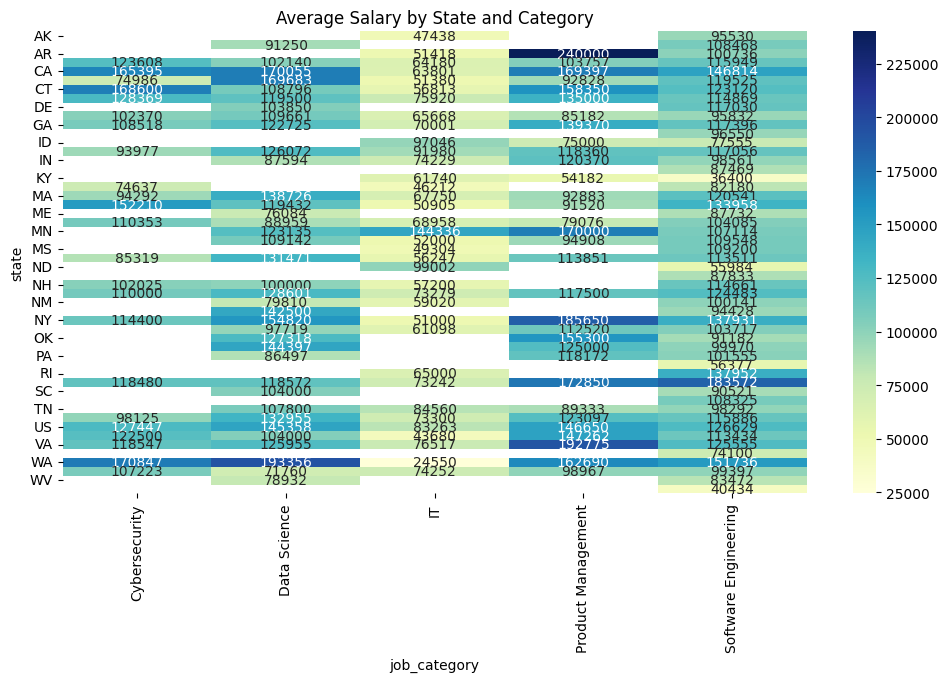

In [9]:
df['state'] = df['location'].str.extract(r'([A-Z]{2})$')
pivot = df.pivot_table(index='state', columns='job_category', values='mean_salary', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Average Salary by State and Category')
plt.show()

**Filter Fresher-Friendly Jobs**

In [11]:
def is_fresher_friendly(desc):
    desc = str(desc).lower()
    if '0-1' in desc or 'entry level' in desc or 'junior' in desc or 'no experience' in desc:
        return True
    if '1 year' in desc and 'experience' in desc:
        return True
    return False

df['is_fresher_friendly'] = df['cleaned_description'].apply(is_fresher_friendly)

<Axes: title={'center': 'Fresher-Friendly Jobs by Category'}, xlabel='job_category'>

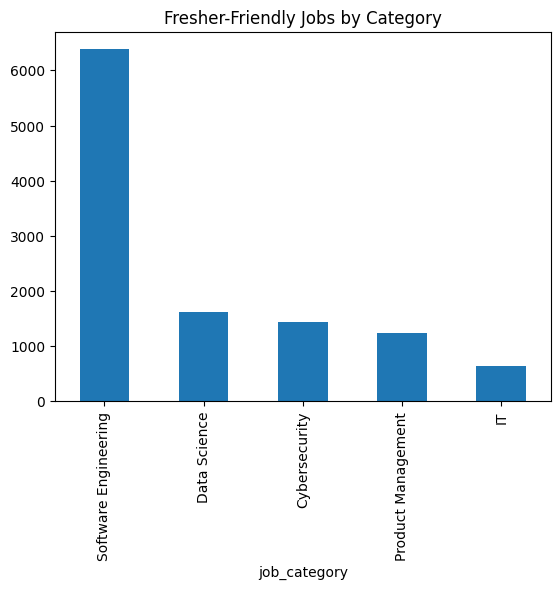

In [12]:
fresher_jobs = df[df['is_fresher_friendly']]
fresher_jobs['job_category'].value_counts().plot(kind='bar', title='Fresher-Friendly Jobs by Category')

**Companies Hiring CPT/OPT Students**

In [13]:
def is_opt_cpt_friendly(desc):
    desc = str(desc).lower()
    keywords = ['cpt', 'opt', 'work authorization', 'visa sponsorship']
    return any(k in desc for k in keywords)

df['is_opt_cpt_friendly'] = df['cleaned_description'].apply(is_opt_cpt_friendly)

<Axes: title={'center': 'Top CPT/OPT Friendly Companies'}, ylabel='company'>

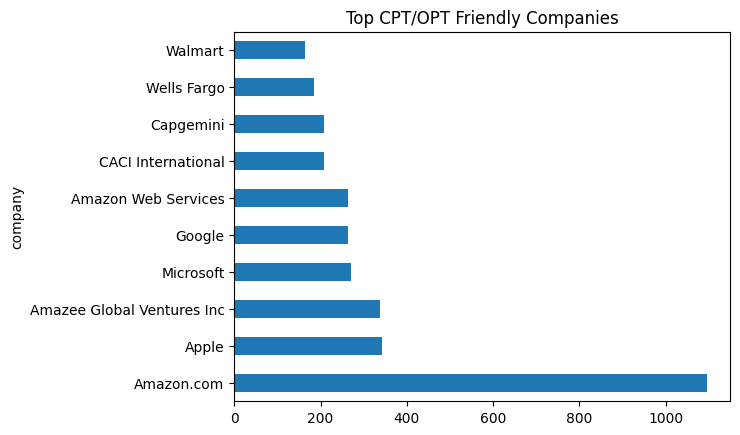

In [14]:
opt_friendly_companies = df[df['is_opt_cpt_friendly']]['company'].value_counts().head(10)
opt_friendly_companies.plot(kind='barh', title='Top CPT/OPT Friendly Companies')

In [15]:
df[(df['is_opt_cpt_friendly']) & (df['is_fresher_friendly'])].shape

(5364, 34)

**Top Programming Languages per Job Category**

In [21]:
import matplotlib.pyplot as plt
from collections import Counter

In [22]:
languages = [
    'python', 'java', 'javascript', 'typescript', 'sql', 'r', 'scala', 'matlab',
    'c++', 'c#', 'go', 'ruby', 'perl', 'bash', 'shell', 'powershell',
    'php', 'html', 'css', 'xml', 'json', 'yaml', 'kotlin', 'swift', 'objective-c',
    'haskell', 'rust', 'dart', 'assembly', 'vb.net', 'groovy', 'lua',
    'julia', 'sas', 'stata', 'spark', 'tensorflow', 'pytorch',
    'hadoop', 'kubernetes', 'docker', 'linux', 'unix'
]

In [23]:
def top_languages_pie(category):
    descs = df[df['job_category'] == category]['cleaned_description'].dropna().str.lower()
    counts = Counter()

    for desc in descs:
        for lang in languages:
            if f'{lang}' in desc:
                counts[lang] += 1

    top5 = dict(Counter(counts).most_common(5))

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(top5.values(), labels=top5.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f"Top 5 Programming Languages in {category}")
    plt.axis('equal')
    plt.show()

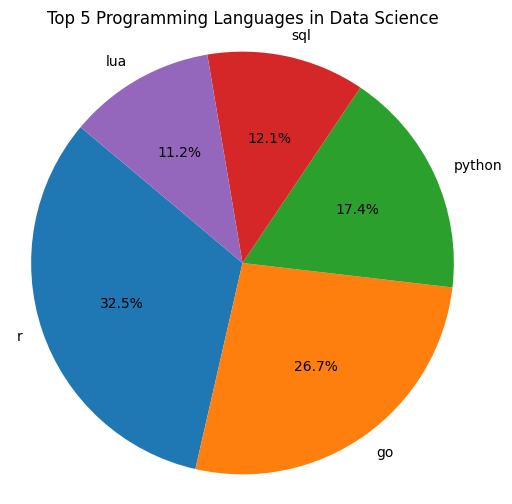

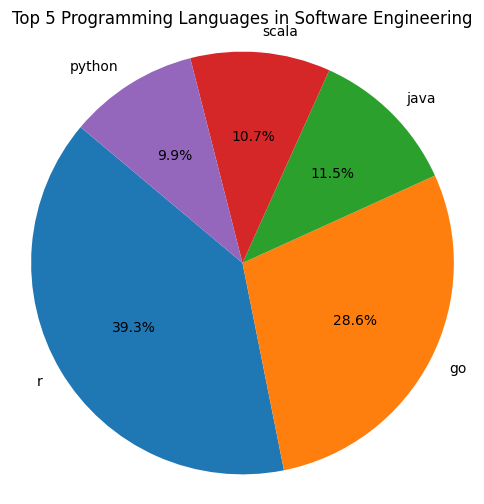

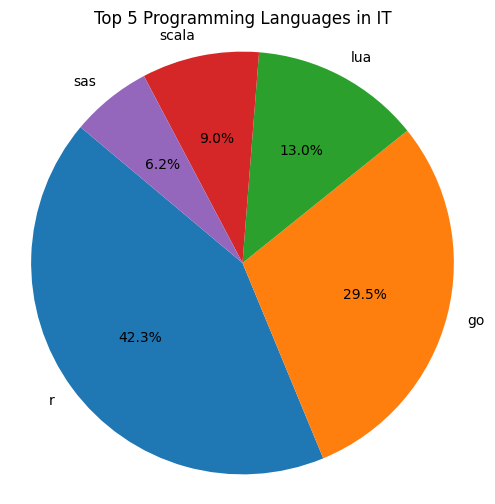

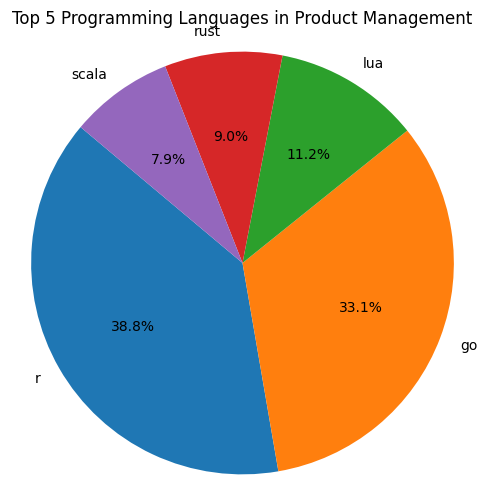

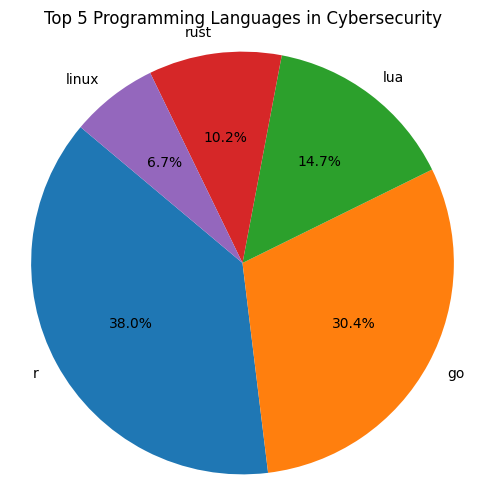

In [24]:
categories = ['Data Science', 'Software Engineering', 'IT', 'Product Management', 'Cybersecurity']
for cat in categories:
    top_languages_pie(cat)

**WordCloud by Category**

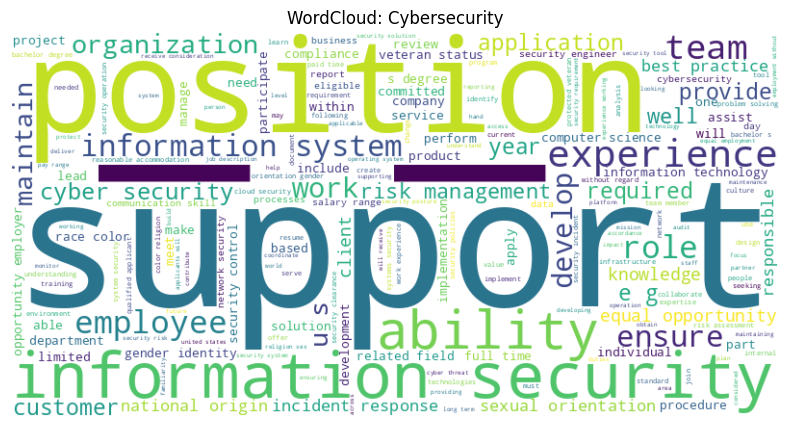

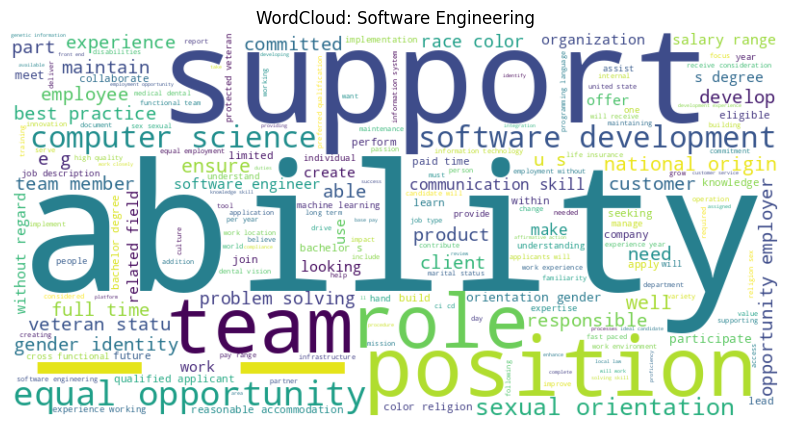

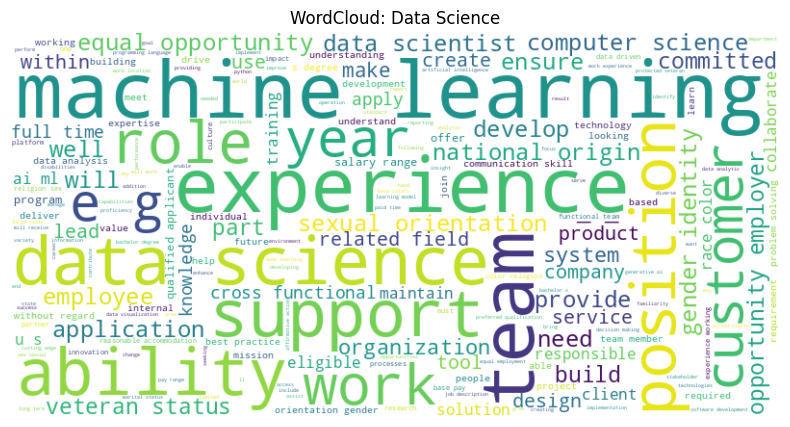

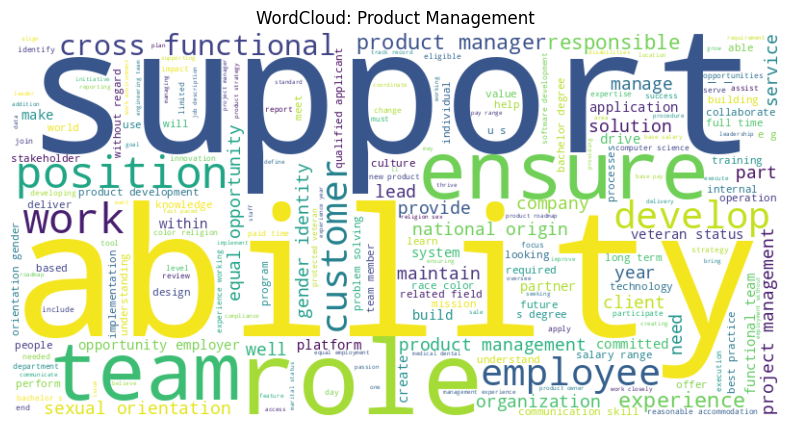

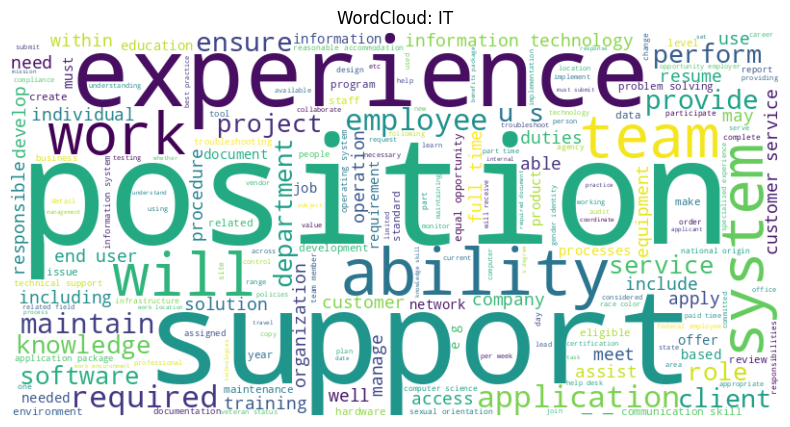

In [10]:
from wordcloud import WordCloud

for cat in categories:
    text = ' '.join(df[df['job_category'] == cat]['cleaned_description'].dropna().astype(str).values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud: {cat}')
    plt.show()